In [1]:
import time
from pathlib import Path
from fastai.vision.all import *

In [2]:
class WoodPicture:
    def __init__(self, name, path, dataset):
        self.name = name
        self.path = path
        self.dataset = dataset

    def image(self):
        return Image.open(self.path)

def get_images(x):
    return x

def get_path(x):
    return x.path

def get_name(x):
    return x.name

model_dir = Path("/data/auto-save")
learn = load_learner(model_dir / "best_model")

In [3]:
test_woods = ["bocote","chestnut"]
for test_wood in test_woods:
    test_dir = Path("../../test-images") / test_wood
    for x in test_dir.iterdir():
        if x.is_file():
            image = PILImage.create(x)
            name, _, _ = learn.predict(image)
            print(f"{x}: expected '{test_wood}', got '{name}'")

../../test-images/bocote/bocCloseup-small.jpg: expected 'bocote', got 'bocote'


../../test-images/bocote/bocote-v2.jpg: expected 'bocote', got 'bocote'


../../test-images/bocote/bocBF-small.jpg: expected 'bocote', got 'bocote'


../../test-images/bocote/bocote-1000x500-2.jpg: expected 'bocote', got 'zircote'


../../test-images/chestnut/wormy-chestnut@2x.webp: expected 'chestnut', got 'oak, red'


../../test-images/chestnut/istockphoto-182856415-1024x1024.jpg: expected 'chestnut', got 'oak, misc'


../../test-images/chestnut/reclaimed-barnwood-farm-table_04.jpg: expected 'chestnut', got 'pine, heart'


In [4]:
image = PILImage.create("../../test-images/chestnut/istockphoto-182856415-1024x1024.jpg")
name, idx, probs = learn.predict(image)

In [5]:
name

'oak, misc'

In [6]:
val, idx = probs.topk(5)
idx

TensorBase([233, 123,  19,  79, 235])

In [7]:
for prediction in zip(val, idx): 
    print(f"{learn.dls.vocab[prediction[1]]}: {'%.02f' % (prediction[0] * 100)}%")

oak, misc: 64.91%
hickory: 13.97%
ash, misc: 13.21%
chestnut: 2.81%
oak, red: 0.89%


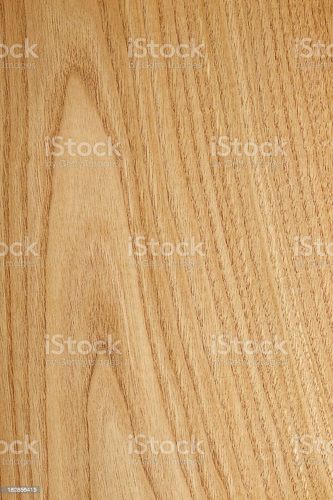

In [8]:
image.to_thumb(500)